# Comparison of the fullrun with the cosmo run in the SPT catalog. 


In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from glob import glob
import numpy as np
import healpy as hp
import struct

import setup
from astropy.table import Table
#Coordinate
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord
from astropy.io import fits

import pandas as pd
from tqdm import tqdm
import math

import pickle
from matched_clusters import matched_clusters

In [2]:
#Plotting params
#Plotting parameters
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter


mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.labelsize'], mpl.rcParams['ytick.labelsize'] = 20, 20

# Parameters used in this module
# One dictionary to store default values
# Another that user can view/change as necessary
Default_Params = {'default_cmap'   : plt.cm.coolwarm,
                  'title_fontsize' : 25,
                  'legend_fontsize': 22,
                  'xlabel_fontsize': 30,
                  'ylabel_fontsize': 30,
                  'scatter_factor' : 1.0}

Params = Default_Params.copy()

In [3]:
from matched_clusters import matched_clusters
from matched_clusters_plot import *

In [4]:
##Created a combined dataframe of SPT matched DES clusters in the DES Y3 footprint. 
datadir = setup.data_home_dir()
bigdatadir = setup.bigdata_home_dir()

## Import catalogs

In [10]:
import pickle
## Read the saved matched clusters. 
matched_pkl = 'output/' + 'matched_spt_combined_cosmoz_lgt20_vl02_dsep1500_deltaz0.1.pkl'

with open(matched_pkl, 'rb') as inp:
    matched_cosmorun = pickle.load(inp)

In [11]:
import pickle
## Read the saved matched clusters. 
matched_pkl = 'output/' + 'matched_spt_combined_cosmoz_lgt5_vl50_dsep1500_deltaz0.1.pkl'

with open(matched_pkl, 'rb') as inp:
    matched_fullrun = pickle.load(inp)

In [12]:
top_match_cosmo = matched_cosmorun.get_match_top_df()
top_match_full = matched_fullrun.get_match_top_df()

In [13]:
no_match_cosmo = matched_cosmorun.get_nomatch_df()
no_match_full = matched_fullrun.get_nomatch_df()

### Importing zmask 

In [49]:
RM_zmax_file = bigdatadir + 'redMaPPer/' + 'y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt20_vl02_vlim_zmask.csv'
RM_zmax = pd.read_csv(RM_zmax_file)

In [50]:
#Drop duplicated
print("Length of file is", len(RM_zmax)) 
RM_zmax.drop_duplicates(subset=['HPIX'], inplace=True)
print("After dropping duplicated length of file is", len(RM_zmax)) 

Length of file is 22841161
After dropping duplicated length of file is 22841161


## Comparison of matching properties. 

### Find the number of overlapping matches

In [14]:
inner_join = top_match_full['SPT_ID'].isin(top_match_cosmo['SPT_ID'])
top_match_merge = top_match_full[inner_join]

In [15]:
top_match_merge.head(3)

,SPT_ID,XI,FIELD,RA_SPT,DEC_SPT,F_CONT_LFC,Z_SPT,LAMBDA_LFC,M500,HPIX,...,ILUM,Z_LAMBDA_RAW,Z_LAMBDA_E_RAW,LIM_EXPTIME,LIM_LIMMAG_DERED,LIM_LIMMAG,LIM_LIMMAG_HARD,MASKGAL_INDEX,propD_sep,Delta_Z
0,SPT-CLJ2248-4431,42.356873,MCMF-SZ,342.185333,-44.526798,0.0,0.351660,242.525440,10.266680,171255812,...,104.56685,0.350546,0.002483,0.257282,22.409746,22.409746,23.559084,15.0,802.630566,0.022134
3,SPT-CLJ2344-4243,27.440960,MCMF-SZ,356.179321,-42.720863,0.0,0.594375,221.675933,7.390675,168965409,...,99.86435,0.599744,0.003187,0.412710,22.767038,22.767038,23.559084,47.0,96.788434,-0.003038
7,SPT-CLJ0438-5419,22.884483,MCMF-SZ,69.573631,-54.319405,0.0,0.425687,144.836263,6.485478,182423868,...,87.18030,0.423717,0.003702,0.312078,22.555727,22.555727,23.559084,1.0,77.439639,-0.038171


## Find the matches in the full run that were filtered out in the cosmo run

In [16]:
inner_join = top_match_full['SPT_ID'].isin(no_match_cosmo['SPT_ID'])
match_full_only = top_match_full[inner_join]

In [17]:
match_full_only.head(3)

,SPT_ID,XI,FIELD,RA_SPT,DEC_SPT,F_CONT_LFC,Z_SPT,LAMBDA_LFC,M500,HPIX,...,ILUM,Z_LAMBDA_RAW,Z_LAMBDA_E_RAW,LIM_EXPTIME,LIM_LIMMAG_DERED,LIM_LIMMAG,LIM_LIMMAG_HARD,MASKGAL_INDEX,propD_sep,Delta_Z
26,SPT-CLJ2145-5644,12.595391,MCMF-SZ,326.463623,-56.746647,0.000000,0.472270,117.283538,4.369248,184845982,...,7.791552,0.475462,0.005227,0.245399,22.373995,22.373995,23.559084,91.0,1377.739998,0.014944
297,SPT-CLJ2118-5055,5.537649,MCMF-SZ,319.730133,-50.931313,0.000000,0.623368,106.586288,2.421613,178819750,...,74.323910,0.628169,0.005591,0.340670,22.622004,22.622004,23.559084,93.0,138.97074,0.014084
445,SPT-CLJ0203-5651,4.880158,MCMF-SZ,30.827538,-56.860317,0.068963,0.552520,18.138778,2.072065,184939760,...,7.763301,0.553899,0.012799,0.206405,22.243160,22.243160,23.559084,87.0,393.519421,-0.001038


## Sanity check: All matches in the cosmorun should be in the full run
match_cosmo_only should be null

In [92]:
inner_join = top_match_cosmo['SPT_ID'].isin(no_match_full['SPT_ID'])
match_cosmo_only = top_match_cosmo[inner_join]

In [93]:
match_cosmo_only

,SPT_ID,XI,FIELD,RA_SPT,DEC_SPT,F_CONT_LFC,Z_SPT,LAMBDA_LFC,M500,HPIX,...,ILUM,Z_LAMBDA_RAW,Z_LAMBDA_E_RAW,LIM_EXPTIME,LIM_LIMMAG_DERED,LIM_LIMMAG,LIM_LIMMAG_HARD,MASKGAL_INDEX,propD_sep,Delta_Z


## No matches in either of the catalogs

In [18]:
inner_join = no_match_full['SPT_ID'].isin(no_match_cosmo['SPT_ID'])
no_match_merge = no_match_full[inner_join]

In [19]:
len(no_match_merge)

30

## Cluster analyses
Three categories:
* Mutual matches.
    * SPT cluster matched to the same RM
    * SPT cluster matched to different RM. 
* One sided matches
* Both no matches

Plots to show:
* Plot the richness-mass distribution.
* Plot the (M,z) relation. 

#### Scaling relations

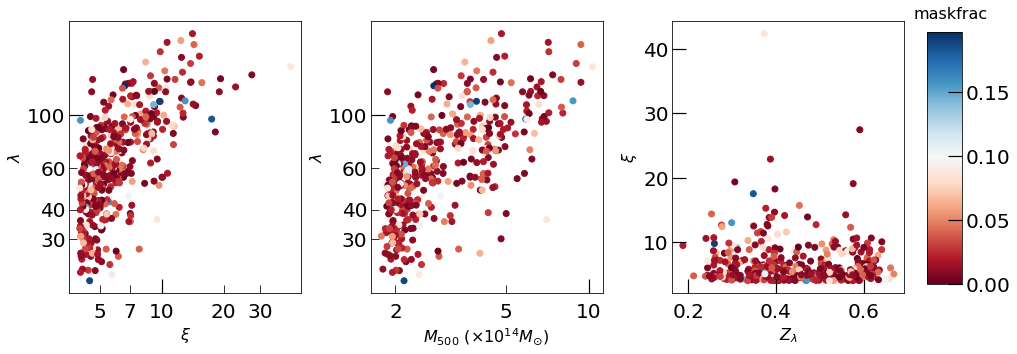

In [20]:
# For mutual matches
plot_scaling_relations(top_match_merge)

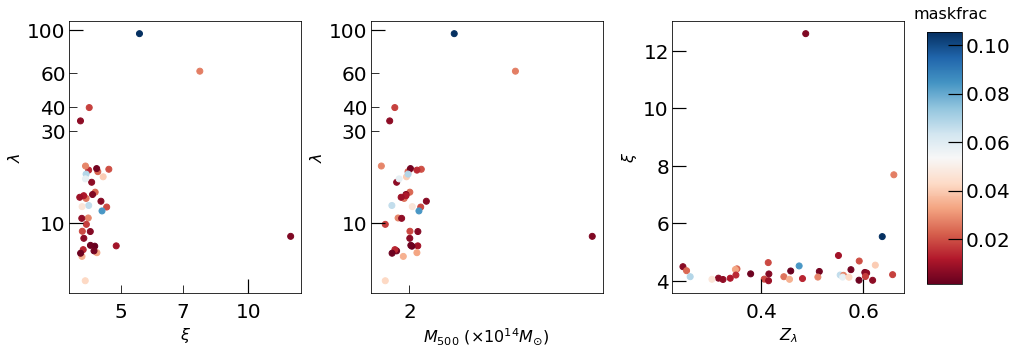

In [21]:
# For one sided matches
plot_scaling_relations(match_full_only)

<Figure size 432x288 with 0 Axes>

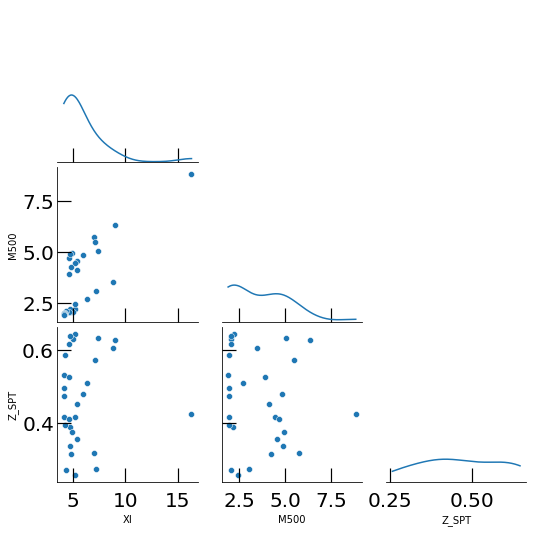

In [22]:
plot_nomatch_properties(no_match_merge)

<Figure size 432x288 with 0 Axes>

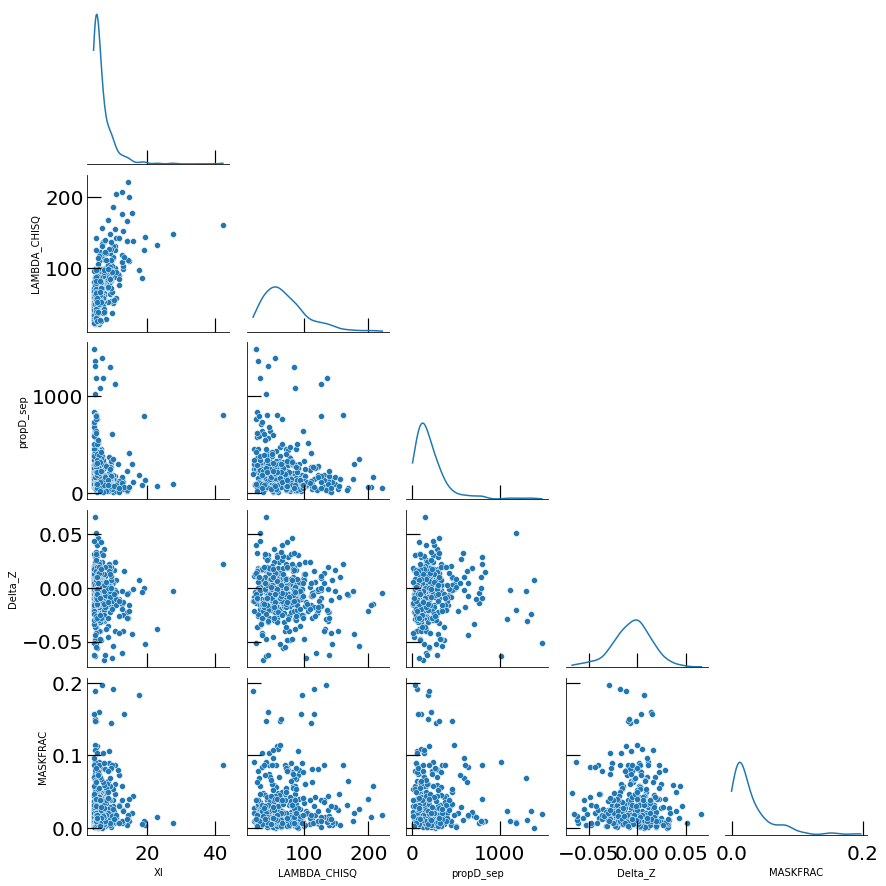

In [23]:
plot_matched_properties(top_match_merge)

<Figure size 432x288 with 0 Axes>

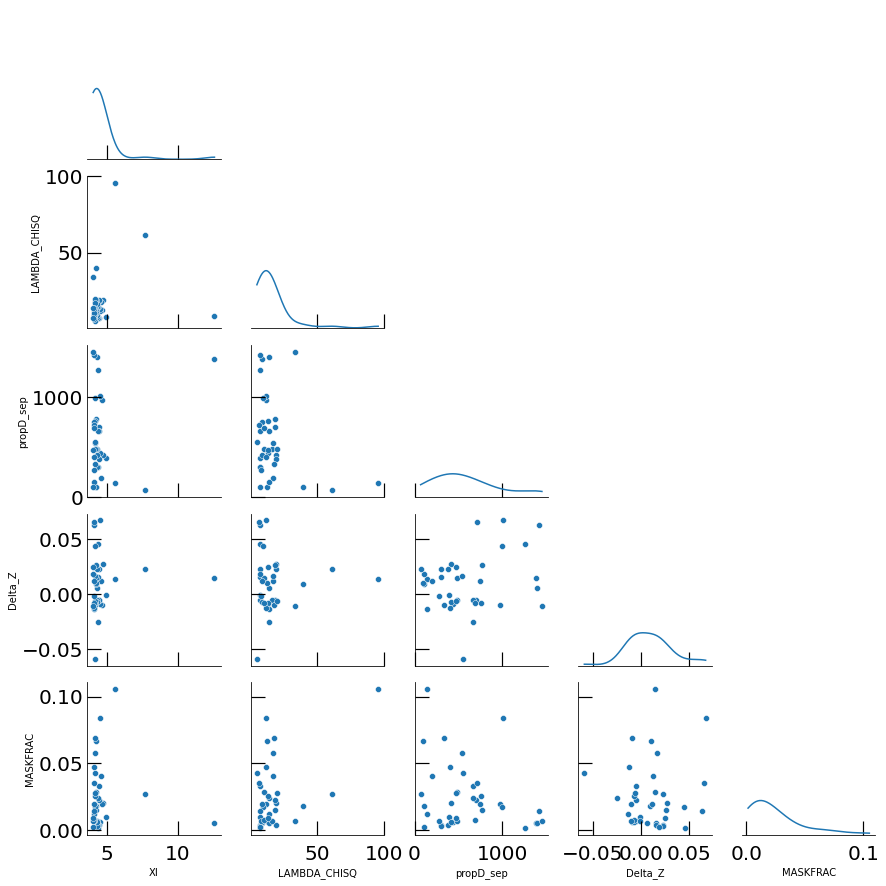

In [24]:
plot_matched_properties(match_full_only)

## Analyzing edge cases

### Category 1
* Clusters above richness > 20 in the match_full_only 

We explore:
* If they exceed the survey depth at the tile
* If they have low FRACGOOD at the pixel of the SPT center
* If they are in the RM cosmorun catalog. 

Call this category 1

In [33]:
catg1_df = match_full_only[match_full_only.LAMBDA_CHISQ > 20]

In [86]:
catg1_df.sort_values(by='LAMBDA_CHISQ', ascending=False)[['SPT_ID','MEM_MATCH_ID','RA_SPT', 'DEC_SPT', 'FIELD','XI','LAMBDA_CHISQ', 'propD_sep', 'Z_SPT', 'Z_REDM']]

,SPT_ID,MEM_MATCH_ID,RA_SPT,DEC_SPT,FIELD,XI,LAMBDA_CHISQ,propD_sep,Z_SPT,Z_REDM
297,SPT-CLJ2118-5055,515.0,319.730133,-50.931313,MCMF-SZ,5.537649,95.774940,138.97074,0.623368,0.637452
2070,SPT-CLJ2358-5229,2302.0,359.531799,-52.483997,SPTPOL_100d,7.687612,61.207170,69.01457,0.637700,0.660238
1049,SPT-CLJ0327-4009,8516.0,51.921219,-40.154877,MCMF-SZ,4.214133,39.651894,104.063542,0.648210,0.657804
1497,SPT-CLJ0142-5029,17683.0,25.690159,-50.492359,MCMF-SZ,4.018623,33.824493,1450.813297,0.629132,0.618584


In [51]:
#This could potentially be explained by zmask
spt_pix=hp.ang2pix(4096, catg1_df.RA_SPT.values, catg1_df.DEC_SPT.values, lonlat=True)

In [52]:
RM_zmax[RM_zmax.HPIX.isin(spt_pix)]

,HPIX,FRACGOOD,ZMAX,MASKFRAC_EST
13110800,165570874,0.968750,0.704,0.0
17925452,178323015,0.984375,0.668,0.0
18124697,178819750,0.937500,0.608,0.0
18796444,180518875,1.000000,0.665,0.0


In [54]:
## Check whether the clusters exist in the cosmorun RM
redM_cosmo = datadir + '/redMaPPer/y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt20_vl02_catalog.csv'
redM_cosmo = pd.read_csv(redM_cosmo)
print(redM_cosmo.columns)
print("Number of clusters equals", len(redM_cosmo))


Index(['MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG',
       'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z',
       'Z_SPEC_INIT', 'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E',
       'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC',
       'GEOMASKFRAC', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ',
       'Z_LAMBDA', 'Z_LAMBDA_E', 'Z_LAMBDA_NITER', 'EBV_MEAN', 'LNLAMLIKE',
       'LNBCGLIKE', 'LNLIKE', 'PZBINS', 'PZ', 'NCROSS', 'RMASK', 'RA_ORIG',
       'DEC_ORIG', 'W', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ',
       'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C', 'LAMBDA_CHISQ_CE', 'NCENT',
       'NCENT_GOOD', 'RA_CENT', 'DEC_CENT', 'ID_CENT', 'LAMBDA_CHISQ_CENT',
       'ZLAMBDA_CENT', 'P_BCG', 'P_CEN', 'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT',
       'P_C', 'BCG_ILUM', 'ILUM', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW',
       'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD',
       'MASKGAL_INDEX'],
      dtype='object')

In [61]:
redM_cosmo[redM_cosmo.MEM_MATCH_ID.isin(catg1_df.MEM_MATCH_ID)]

,MEM_MATCH_ID,RA,DEC,MODEL_MAG,MODEL_MAGERR,REFMAG,REFMAG_ERR,ZRED,ZRED_E,ZRED_CHISQ,...,P_C,BCG_ILUM,ILUM,Z_LAMBDA_RAW,Z_LAMBDA_E_RAW,LIM_EXPTIME,LIM_LIMMAG_DERED,LIM_LIMMAG,LIM_LIMMAG_HARD,MASKGAL_INDEX


### Category 2:
* Scaling relation outliers in the match_full_only catalog.

There is one such cluster


SPT-ID,              MEM_MATCH_ID,       XI,           LAMBDA_CHISQ,   Z_SPT,       Z_REDM

SPT-CLJ2145-5644,	638.0,	           12.595391,	8.531744,	   0.472270,	   0.487214


In [71]:
catg2_df = match_full_only.sort_values(by='XI', ascending=False).head(1) #only one cluster

In [87]:
catg2_df[['SPT_ID','MEM_MATCH_ID','RA_SPT', 'DEC_SPT', 'FIELD','XI','LAMBDA_CHISQ', 'propD_sep', 'Z_SPT', 'Z_REDM']]

,SPT_ID,MEM_MATCH_ID,RA_SPT,DEC_SPT,FIELD,XI,LAMBDA_CHISQ,propD_sep,Z_SPT,Z_REDM
26,SPT-CLJ2145-5644,638.0,326.463623,-56.746647,MCMF-SZ,12.595391,8.531744,1377.739998,0.47227,0.487214


In [73]:
#This could potentially be explained by zmask
spt_pix=hp.ang2pix(4096, catg2_df.RA_SPT.values, catg2_df.DEC_SPT.values, lonlat=True)

In [74]:
RM_zmax[RM_zmax.HPIX.isin(spt_pix)]

,HPIX,FRACGOOD,ZMAX,MASKFRAC_EST
20527772,184845982,0.953125,0.731,0.0


In [75]:
redM_cosmo[redM_cosmo.MEM_MATCH_ID.isin(catg2_df.MEM_MATCH_ID)]

,MEM_MATCH_ID,RA,DEC,MODEL_MAG,MODEL_MAGERR,REFMAG,REFMAG_ERR,ZRED,ZRED_E,ZRED_CHISQ,...,P_C,BCG_ILUM,ILUM,Z_LAMBDA_RAW,Z_LAMBDA_E_RAW,LIM_EXPTIME,LIM_LIMMAG_DERED,LIM_LIMMAG,LIM_LIMMAG_HARD,MASKGAL_INDEX


### Category 3: 
* No_match_merge

Explore:
* ZMask and FRACGOOD
* 

In [81]:
catg3_df = no_match_merge.sort_values(by='XI', ascending=False)

In [85]:
catg3_df[['SPT_ID','RA_SPT', 'DEC_SPT', 'FIELD','XI','Z_SPT']]

,SPT_ID,RA_SPT,DEC_SPT,FIELD,XI,Z_SPT
1627,SPT-CLJ0358-2955,59.720139,-29.929886,ECS,16.328104,0.425000
1626,SPT-CLJ0358-2415,59.696594,-24.256235,ECS,9.059296,0.625882
79,SPT-CLJ2232-5959,338.145386,-59.993999,MCMF-SZ,8.797222,0.604875
1577,SPT-CLJ0257-3449,44.445339,-34.830894,ECS,7.418058,0.632302
137,SPT-CLJ0311-6354,47.824726,-63.906364,MCMF-SZ,7.161761,0.272700
1631,SPT-CLJ0404-3526,61.159050,-35.442253,ECS,7.080905,0.571553
1568,SPT-CLJ0246-2033,41.615063,-20.555548,ECS,7.048779,0.317296
197,SPT-CLJ0304-4748,46.148701,-47.810936,MCMF-SZ,6.381045,0.509400
1664,SPT-CLJ0540-3918,85.010323,-39.305378,ECS,5.916968,0.478627
1613,SPT-CLJ0347-3333,56.884518,-33.563690,ECS,5.416896,0.451318


In [88]:
#This could potentially be explained by zmask
spt_pix=hp.ang2pix(4096, catg3_df.RA_SPT.values, catg3_df.DEC_SPT.values, lonlat=True)

In [90]:
RM_zmax[RM_zmax.HPIX.isin(spt_pix)].head(5)

,HPIX,FRACGOOD,ZMAX,MASKFRAC_EST
6239992,135997286,1.000000,0.545,0.0
6305217,136324163,0.953125,0.726,0.0
6691401,138224732,0.765625,0.647,0.0
7495892,142011036,1.000000,0.674,0.0
8646393,147154364,0.562500,0.636,0.0
